# **Decision Tree**

In this notebook, we will perform a desicion tree model which is an effective classification model, decision tree model outputs a set of rules, and each rule is a If-else chain from root to a leaf node. Decision tree mimics human reasoning process which makes it very intuitive to human users and makes it a high-interpretable model.

We will train a decision tree model and customized some of their hyperparameters, and we will also make a diagram of the model nodes.

We will be using a tumor sample dataset, which contains lab test results about tumor samples. The objective is to classify whether a tumor is malicious (cancer) or benign. As such, it is a typical binary classification task.

First we import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rs = 123 #We define a ramdom seed

### Exploratory data analysis

Each observation in this dataset contains lab tests results about a tumor sample, such as clump or shapes. Based on these lab test results or features, we want to build a classification model to predict if this tumor sample is malicious (cancer) and benign. The target variable `y` is specified in the `Class` column.


First, we load dataset and we see the size of it.

In [3]:
tumor_df = pd.read_csv('tumor_df.csv')
tumor_df.shape

(683, 10)

Let's check some rows.

In [4]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [5]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int64
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


From the above output we can see there are no large quantities in the columns so we dont have to standardize our data, we dont have either dtypes and our data, and the targer varibale is the class column.

Now, let's split the dataframe into train and testing data


In [6]:
# We get the input features
X = tumor_df.iloc[:, :-1]
# We get the target variable
y = tumor_df.iloc[:, -1:]

In [7]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

### Decision tree model

First we define the Decision tree object, and we will use default arguments to see his performance.

In [8]:
model = DecisionTreeClassifier(random_state=rs)

Then we can train the decision tree model with the data.

In [9]:
model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=123)

Last we make predictions on the test data.

In [10]:
preds = model.predict(X_test)

We make a utility method to evaluate the performanced trained decision tree model, the function return the accuracy_score, recall, precision and the f1score.

In [11]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [12]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9562043795620438,
 'recall': 0.9583333333333334,
 'precision': 0.92,
 'f1score': 0.9387755102040817}

Now we can see that the trained decision model has very good classification results on the testing data, with a very high F1 score around 0.94. 

### Using GridSearch to search the best parameters of the tree model 

The decision model has many arguments (model hyperparameters), this time we will use just the three more important which are, criterion, max_depth, min_samples_leaf.

First we create a dictonari of parameters.

In [13]:
params_grid = {'criterion': ['gini', 'entropy'],
               'max_depth': [5, 10, 15, 20],
               'min_samples_leaf': [1, 2, 5]}
    

Then we create a default decision tree classifier to be tuned:

In [14]:
model = DecisionTreeClassifier(random_state=rs)

Now we use the GridSearchCV to search the best parameters generating the highest F1 score.

In [15]:
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


And we print the best parameters, store in the best_params variable.

In [16]:
best_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

Now we can use these parameters to fit our new tree model.

In [17]:
best_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=rs)
# We fit the model with the data 
best_model.fit(X_train, y_train.values.ravel())
# We make the predictions on the test set
preds = best_model.predict(X_test)
#We visualizate the metrics
print(evaluate_metrics(y_test, preds))

{'accuracy': 0.9708029197080292, 'recall': 0.9791666666666666, 'precision': 0.94, 'f1score': 0.9591836734693877}


The F1 score has increased to 0.96 now, which seems better than the previous default decision tree model.

Now, let's visualize the new model using plot_decision_tree() function that we are about to create.

In [18]:
#We define the function
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, feature_names=feature_names, filled=True)
    plt.show()

In [19]:
#We create the array with the column names
feature_names = X.columns.values
feature_names

array(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit'], dtype=object)

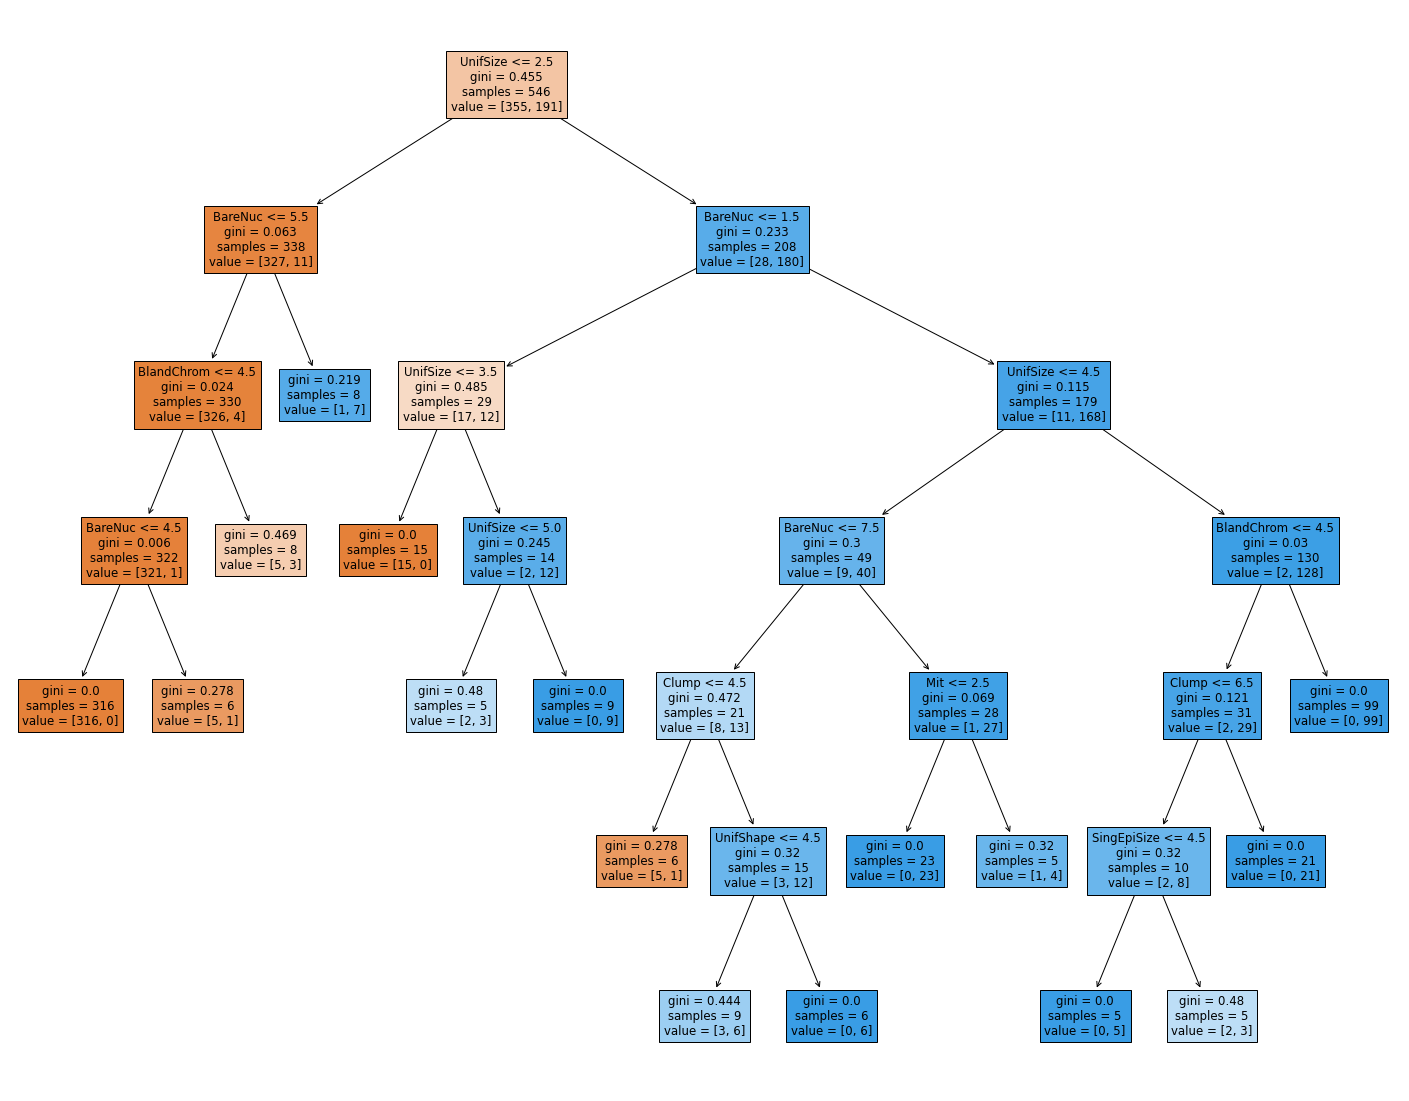

In [20]:
#We call the function
plot_decision_tree(best_model, feature_names)

The orange node means a majority of samples in the node belong to Class 0 and blue node means a majority of samples in the node belong to Class 1, and white node means it has an equal amount of Class 0 and Class 1 samples, but in this plot we dont have white nodes.